In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import json
from tqdm import tqdm
from slither_sol_helpers import *
from pandarallel import pandarallel
from collections import Counter


pandarallel.initialize(progress_bar=True, nb_workers=32)


INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
# load dataset 
# All files in a contrac directory are intended to be slithered. If the the slither process failed, the filed `slither_processed` is set to false
slither_dataset = pd.read_pickle('./slither_processed_contracts.pkl')
slither_dataset.reset_index(drop=True, inplace=True)
slither_processed = slither_dataset[slither_dataset['slither_processed'] == True]['slither']

w_and_e = []
we_sol = 0
we_sol_no = 0
for res in slither_processed:
    if res == None:
        we_sol_no += 1
        continue
    else:
        we_sol +=1
        for e in res:
            w_and_e.append(int(e))


print('Number of Solidity  files: ', len(slither_dataset))
print('Number of Solidity slither processed files: ', len(slither_dataset[slither_dataset['slither_processed'] == True]))
print('Number of Solidity NOT slither processed files: ', len(slither_dataset[slither_dataset['slither_processed'] == False]))
print('Number of Solidity slither processed files with at least 1 warning: ', we_sol)
print('Number of Solidity slither processed files with NO warning: ', we_sol_no)

Number of Solidity  files:  310226
Number of Solidity slither processed files:  245287
Number of Solidity NOT slither processed files:  64939
Number of Solidity slither processed files with at least 1 warning:  164167
Number of Solidity slither processed files with NO warning:  81120


In [15]:
ss = sorted(w_and_e)
xx = list(Counter(ss).keys())
yy = list(Counter(ss).values() )
for i in range(len(xx)):
    print(xx[i], '\t--> \t', yy[i])

2 	--> 	 7359
3 	--> 	 68
4 	--> 	 8444
5 	--> 	 3601
7 	--> 	 396
9 	--> 	 10
10 	--> 	 5
11 	--> 	 7864
12 	--> 	 406
13 	--> 	 14236
14 	--> 	 94
15 	--> 	 714
17 	--> 	 61
18 	--> 	 31930
19 	--> 	 6543
20 	--> 	 2889
21 	--> 	 398
22 	--> 	 7504
23 	--> 	 5596
24 	--> 	 751
25 	--> 	 76527
28 	--> 	 53886
29 	--> 	 8316
67 	--> 	 91675
68 	--> 	 11
69 	--> 	 21977
70 	--> 	 3487
71 	--> 	 3312
72 	--> 	 152
73 	--> 	 21576
75 	--> 	 87326
76 	--> 	 1084
77 	--> 	 702656
78 	--> 	 18392
79 	--> 	 28410
80 	--> 	 402992
81 	--> 	 1260
82 	--> 	 24777
83 	--> 	 20975
84 	--> 	 884487
85 	--> 	 28260
86 	--> 	 248169
87 	--> 	 90670
88 	--> 	 12048
89 	--> 	 133089
90 	--> 	 17170
91 	--> 	 68320
92 	--> 	 786


In [18]:
per_file_EW = {}
for k, v in tqdm(detectors.items()):
    idx = v['idx']
    per_file_EW[idx] = 0

    for _, row in slither_dataset.iterrows():
        if row.slither == None: 
            continue # next file please
        if idx in row.slither: 
            per_file_EW[idx] += 1


100%|██████████| 92/92 [23:10<00:00, 15.11s/it]


In [19]:
aa = []
bb = []
for k, v in per_file_EW.items():
    aa.append(k)
    bb.append(v)

In [5]:
# Get total number of warnings and error
with open('./detectors.json', 'r') as fh:
    detectors = json.load(fh)

print(len(detectors))

92


In [6]:
len(w_and_e)

3150659

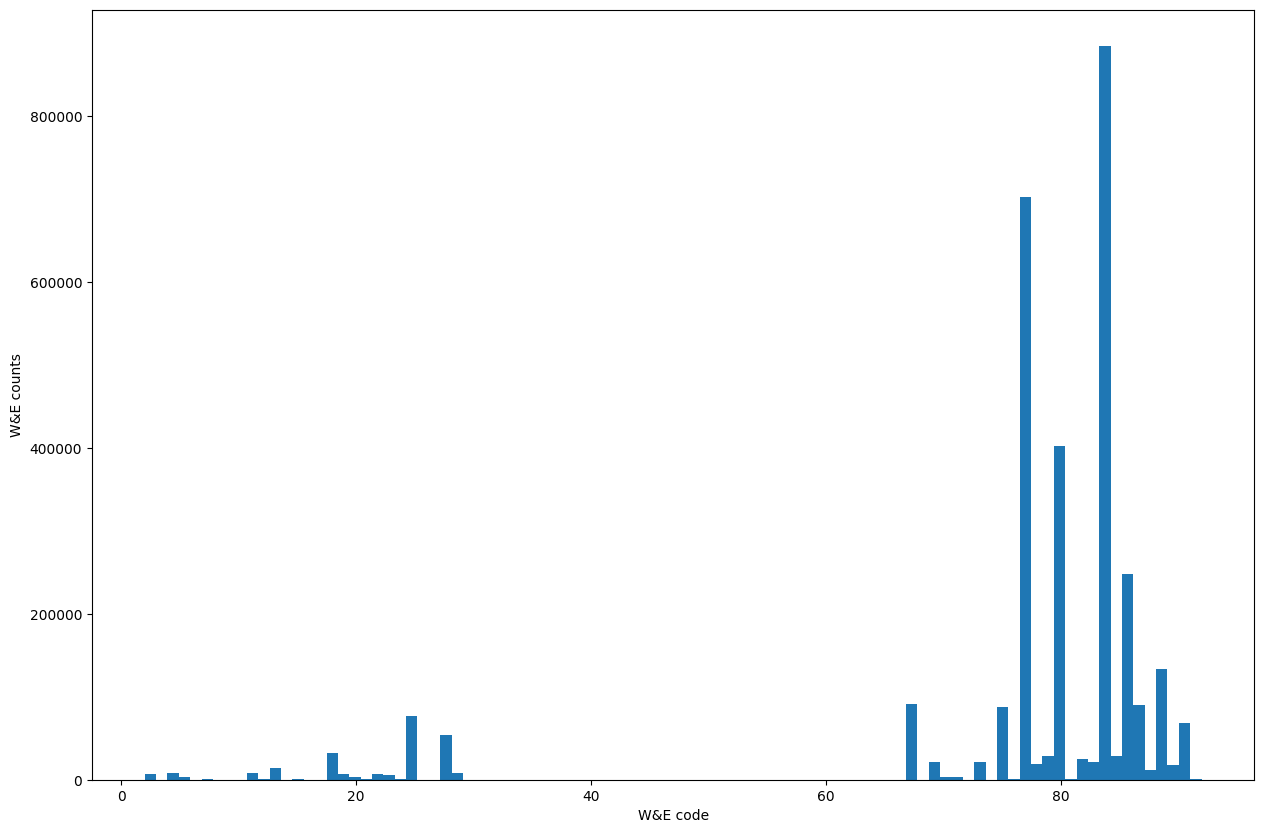

In [9]:
plt.figure(figsize=(15,10))
x = plt.hist(w_and_e, bins=len(detectors)+1)
plt.xlabel('W&E code')
plt.ylabel('W&E counts')
plt.show()

In [10]:
c, we, _ = x

In [11]:
c_norm = c/len(w_and_e)
we = [int(np.ceil(w)) for w in we]
we = np.delete(we, -1)
print(len(c_norm), len(we))


93 93


In [12]:
def get_key(idx):
    keys = [k for k, v in detectors.items() if v['idx'] == str(idx)]
    return keys[0] if len(keys) else None

get_key(87)

'too-many-digits'

In [13]:
for k, v in detectors.items():
    print(k, v)

abiencoderv2-array {'idx': '1', 'description': 'Storage abiencoderv2 array', 'impact': 'High', 'confidence': 'High\n'}
arbitrary-send-erc20 {'idx': '2', 'description': 'transferFrom uses arbitrary from', 'impact': 'High', 'confidence': 'High\n'}
array-by-reference {'idx': '3', 'description': 'Modifying storage array by value', 'impact': 'High', 'confidence': 'High\n'}
encode-packed-collision {'idx': '4', 'description': 'ABI encodePacked Collision', 'impact': 'High', 'confidence': 'High\n'}
incorrect-shift {'idx': '5', 'description': 'The order of parameters in a shift instruction is incorrect.', 'impact': 'High', 'confidence': 'High\n'}
multiple-constructors {'idx': '6', 'description': 'Multiple constructor schemes', 'impact': 'High', 'confidence': 'High\n'}
name-reused {'idx': '7', 'description': "Contract's name reused", 'impact': 'High', 'confidence': 'High\n'}
protected-vars {'idx': '8', 'description': 'Detected unprotected variables', 'impact': 'High', 'confidence': 'High\n'}
publ

([<matplotlib.patches.Wedge at 0x7f55a182a770>,
 [Text(1.0999703861214776, 0.008071533668855992, '2'),
  Text(1.0998804490118521, 0.016217209423530412, '3'),
  Text(1.0997031907865185, 0.025551754811563413, '4'),
  Text(1.0993169987505074, 0.038757402624239004, '5'),
  Text(1.099153800730525, 0.04313840909956365, '7'),
  Text(1.0991362468663144, 0.043583377847899445, '9'),
  Text(1.099135594873943, 0.04359981744346637, '10'),
  Text(1.098759664561663, 0.052222595993899786, '11'),
  Text(1.098291673830684, 0.06128131194903027, '12'),
  Text(1.0972799549231584, 0.07730912316041079, '13'),
  Text(1.096063327403621, 0.09297947257810699, '14'),
  Text(1.095988060449753, 0.09386251302617415, '15'),
  Text(1.0959151990877092, 0.09470943146565099, '17'),
  Text(1.0923370578084408, 0.12961385781774706, '18'),
  Text(1.0865623141663194, 0.1714127691670973, '19'),
  Text(1.0849021714393061, 0.18162400283629587, '20'),
  Text(1.0843010651674458, 0.1851788326908405, '21'),
  Text(1.082808349921068,

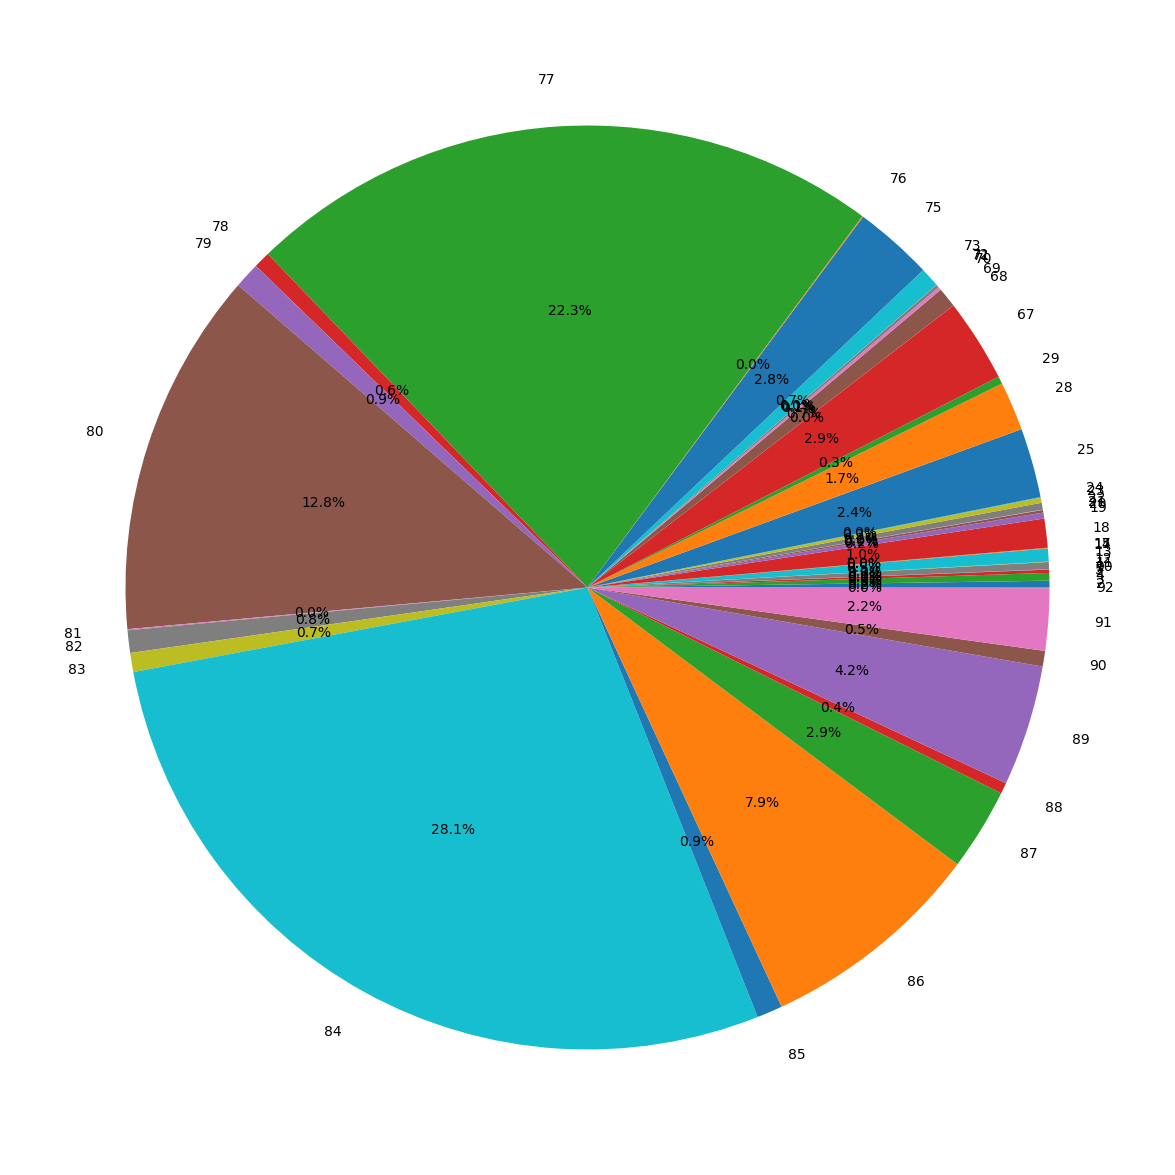

In [17]:
plt.figure(figsize=(15,15))
plt.pie(yy, labels=xx, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f559a13fd00>,
 [Text(1.1, 0.0, '1'),
  Text(1.0996588444396274, 0.027393901615204105, '2'),
  Text(1.0986226522667273, 0.055029700402797914, '3'),
  Text(1.0962159093720738, 0.09116293127997498, '4'),
  Text(1.0915780042342957, 0.13585823740896957, '5'),
  Text(1.0904321902322203, 0.144767532635475, '6'),
  Text(1.0902290677151438, 0.14628937045789958, '7'),
  Text(1.0900238212794684, 0.14781092328818451, '8'),
  Text(1.0900184619072217, 0.14785044031525543, '9'),
  Text(1.090011760677285, 0.14789983632582301, '10'),
  Text(1.0868554678635638, 0.16954407089330537, '11'),
  Text(1.082937832592701, 0.1929913229640729, '12'),
  Text(1.0726751656730753, 0.24365547182084923, '13'),
  Text(1.0604645261060863, 0.2922584282285013, '14'),
  Text(1.059619128539985, 0.2953088255236588, '15'),
  Text(1.0588541450700986, 0.2980400970806965, '16'),
  Text(1.0587757723730056, 0.2983183933919358, '17'),
  Text(1.012395693045206, 0.4301801491276849, '18'),
  Text(0.942

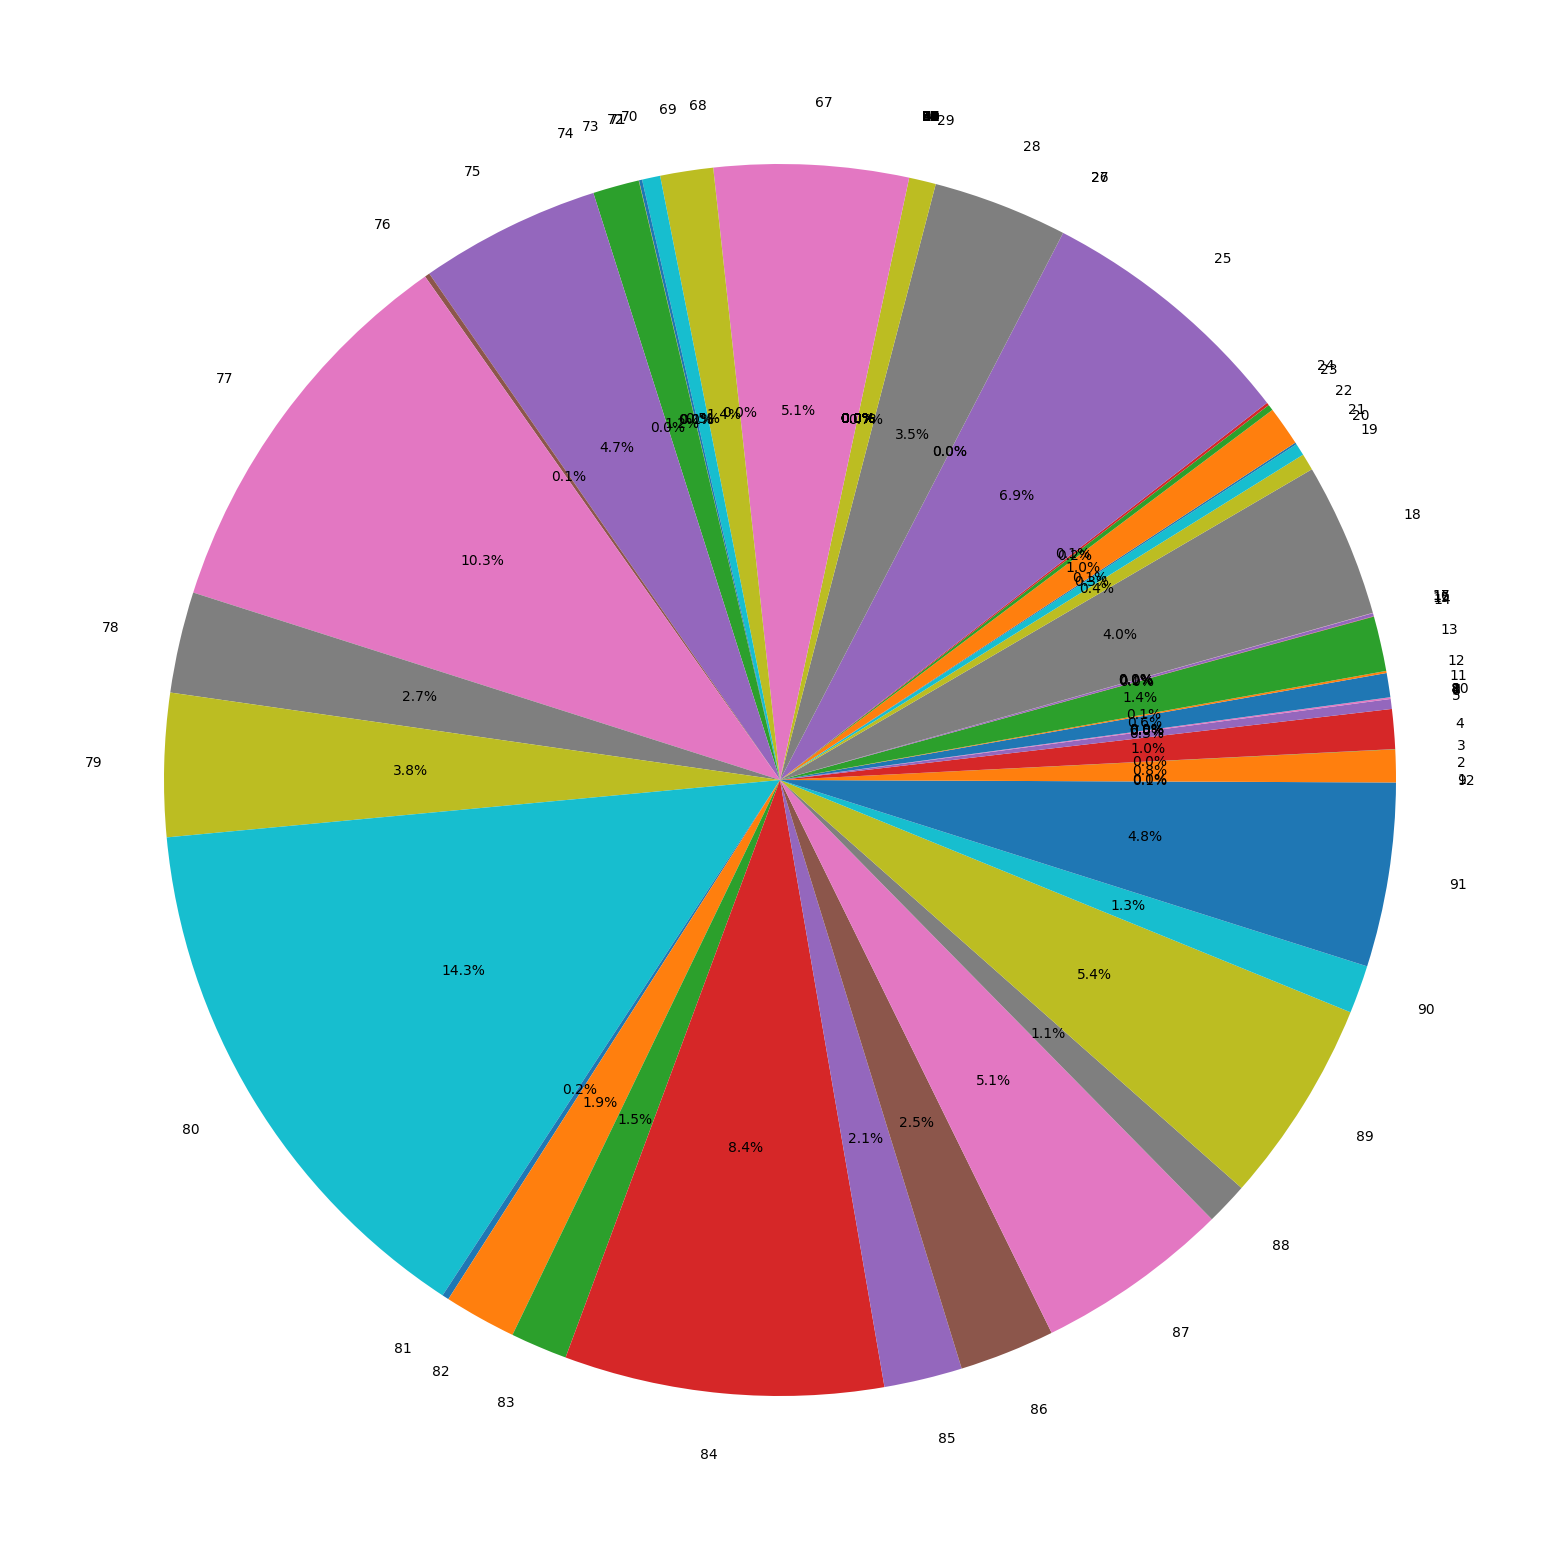

In [20]:
# per file error & warnings distro
plt.figure(figsize=(20,20))
plt.pie(bb, labels=aa, autopct='%1.1f%%')

In [ ]:
get_error_or_warning_codes('High')

In [ ]:
# Test the filtering
slither_dataset = pd.read_pickle('./slither_processed_contracts.pkl')#.sample(100)
slither_dataset.reset_index(drop=True, inplace=True)
slither_processed = slither_dataset[slither_dataset['slither_processed'] == True]

# eliminate High risk files 
high_idx = get_error_or_warning_codes('High')
med_idx = get_error_or_warning_codes('Medium')

test = []
def keep(x, idx_red_list):
    if x == None:
        return True
    else:
        for x_idx in x:
            if int(x_idx) in idx_red_list:
                test.append(int(x_idx))
                print(f'{x_idx} in {idx_red_list} ')
                return False
    return True

print('len before:', len(slither_processed))
slither_processed['keep'] = slither_processed.slither.apply(lambda x: keep(x, np.arange(30))) # remove high impact slither warnings
dataset = slither_processed[slither_processed['keep'] == True]
print('len after:', len(dataset))

In [ ]:
max(test)

In [ ]:
slither_processed